In [6]:
import json

In [5]:
from math import log
import numpy as np

# beam search
def beam_search_decoder(data, k):
    sequences = [[list(), 0.0]]
    # walk over each step in sequence

    max_T, max_A = data.shape

    # Loop over time
    for t in range(max_T):
        all_candidates = list()
        # expand each current candidate
        for i in range(len(sequences)):
            seq, score = sequences[i]
            # Loop over possible alphabet outputs
            for c in range(max_A - 1):
                candidate = [seq + [c], score - log(data[t, c])]
                all_candidates.append(candidate)
        # order all candidates by score
        ordered = sorted(all_candidates, key=lambda tup:tup[1])
        # select k best
        sequences = ordered[:k]
    return sequences

# define a sequence of 10 words (rows) over a vocab of 5 words (columns), 
# e.g.
#      a  bites cat  dog  the
# 1   0.1  0.2  0.3  0.4  0.5
# 2   0.5  0.3  0.5  0.2  0.1
# ...
# 10  0.3  0.4  0.5  0.2  0.1 

data = [[0.1, 0.2, 0.3, 0.4, 0.5],
        [0.4, 0.3, 0.5, 0.2, 0.1],
        [0.1, 0.2, 0.3, 0.4, 0.5],
        [0.5, 0.4, 0.3, 0.2, 0.1],
        [0.1, 0.2, 0.3, 0.4, 0.5],
        [0.5, 0.4, 0.3, 0.2, 0.1],
        [0.1, 0.2, 0.3, 0.4, 0.5],
        [0.5, 0.4, 0.3, 0.2, 0.1],
        [0.1, 0.2, 0.3, 0.4, 0.5],
        [0.3, 0.4, 0.5, 0.2, 0.1]]

data = np.array(data)

beam_width = 3

# decode sequence
result = beam_search_decoder(data, beam_width)
# print result
for i, seq in enumerate(result):
    print(i, seq)

0 [[3, 2, 3, 0, 3, 0, 3, 0, 3, 2], 8.047189562170502]
1 [[3, 2, 3, 0, 3, 0, 3, 0, 3, 1], 8.27033311348471]
2 [[3, 2, 3, 0, 3, 0, 3, 1, 3, 2], 8.27033311348471]


In [58]:
f = open('output.json')
  
json_data = json.load(f)

In [59]:
import numpy as np

data = np.array(json_data['logits'])

In [60]:
data.shape

(107, 28)

In [67]:
result = beam_search_decoder(data, 99)
output = ""
for i, seq in enumerate(result):
    output = " "
    for char in seq[0]:
        alphabet = json_data["alphabet"][char]
        if alphabet!=output[-1]:
            output+=alphabet
    print(output, len(output))

 we mustsois find a newose tholme in the stsar es 49
 we mustsois find a newos tholme in the stsar es 48


In [62]:
# result = beam_search_decoder(data, 1)
# for i, seq in enumerate(result):
#     sns.heatmap(seq[0])

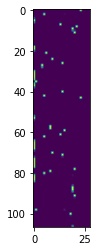

In [63]:
import matplotlib.pyplot as plt
ax = plt.imshow(data)

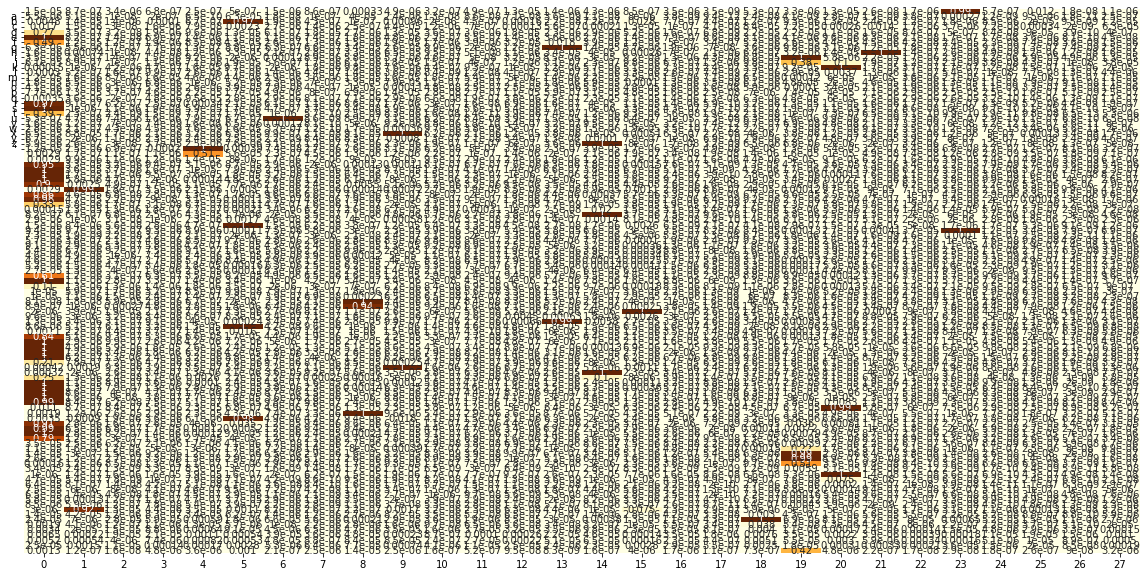

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
sns.heatmap(data, annot=True, cbar=False, cmap="YlOrBr")
plt.yticks(np.arange(len(json_data['alphabet']))+0.5, json_data['alphabet']);